In [8]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import weather_routing
import pandas


In [20]:
##################
# Waypoints for the TransPac 
waypoints = pandas.DataFrame([
    (33.69853, -118.25085, 'Pt. Fermin Bouy'),
    (33.48177, -118.64101, 'Catalina West End'),
    (21.24296, -157.81775, 'Diamond Head Bouy'),
            ], columns=['lat', 'lng', 'name'])
# July 1st, 12:00 PST (-7hr)
Start_Date = 20230701
Start_Time = 20 #20:00 UTC
##################
grib_files_dir = "historical_gribs/2023"

In [21]:
waypoints

,lat,lng,name
0,33.69853,-118.25085,Pt. Fermin Bouy
1,33.48177,-118.64101,Catalina West End
2,21.24296,-157.81775,Diamond Head Bouy


In [27]:
route = weather_routing.route_shortest_path(
    waypoints, 
    start_date=Start_Date, 
    start_time=Start_Time,
    grib_files_dir=grib_files_dir
)

Pt. Fermin Bouy at 2023-07-01 11:00:00-07:00
starting time: 20230701 18 2023-07-01 11:00:00-07:00
loading file: historical_gribs/2023/20230701-18-gfs.t18z.pgrb2.0p25.f000
0: twa=120 mag=200.1 dtg=20.4 sog=4.0
loading file: historical_gribs/2023/20230701-18-gfs.t18z.pgrb2.0p25.f001
1: twa=132.2 mag=210.8 dtg=17.6 sog=3.4
loading file: historical_gribs/2023/20230701-18-gfs.t18z.pgrb2.0p25.f002
2: twa=132.2 mag=213.1 dtg=15.0 sog=3.4
loading file: historical_gribs/2023/20230701-18-gfs.t18z.pgrb2.0p25.f003
3: twa=135 mag=215.6 dtg=12.8 sog=3.1
loading file: historical_gribs/2023/20230701-18-gfs.t18z.pgrb2.0p25.f004
4: twa=135 mag=303.3 dtg=10.5 sog=3.1
loading file: historical_gribs/2023/20230701-18-gfs.t18z.pgrb2.0p25.f005
5: twa=135 mag=217.6 dtg=8.4 sog=3.0
loading file: historical_gribs/2023/20230702-00-gfs.t00z.pgrb2.0p25.f000
6: twa=150 mag=239.3 dtg=6.4 sog=2.3
loading file: historical_gribs/2023/20230702-00-gfs.t00z.pgrb2.0p25.f001
7: twa=150 mag=303.1 dtg=4.4 sog=2.4
loading file:

In [28]:
route

,lat,lng,date,twa,mag,dtg,sog
0,33.698530,-118.250850,2023-07-01 11:00:00-07:00,NaN,NaN,NaN,NaN
1,33.636479,-118.278088,2023-07-01 12:00:00-07:00,120.0,200.076457,20.395880,3.966428
2,33.587309,-118.313215,2023-07-01 13:00:00-07:00,132.2,210.760193,17.586386,3.435159
3,33.539696,-118.350515,2023-07-01 14:00:00-07:00,132.2,213.146978,14.952469,3.413875
4,33.497494,-118.386752,2023-07-01 15:00:00-07:00,135.0,215.607280,12.766398,3.116153
...,...,...,...,...,...,...,...
474,21.090205,-157.611108,2023-07-21 05:00:00-07:00,46.9,356.384783,14.764038,4.850000
475,21.085204,-157.697519,2023-07-21 06:00:00-07:00,46.9,266.465718,11.620319,4.850000
476,21.175763,-157.700604,2023-07-21 07:00:00-07:00,45.8,358.180350,7.698857,5.440000
477,21.169297,-157.797521,2023-07-21 08:00:00-07:00,45.8,265.925127,4.565382,5.440000


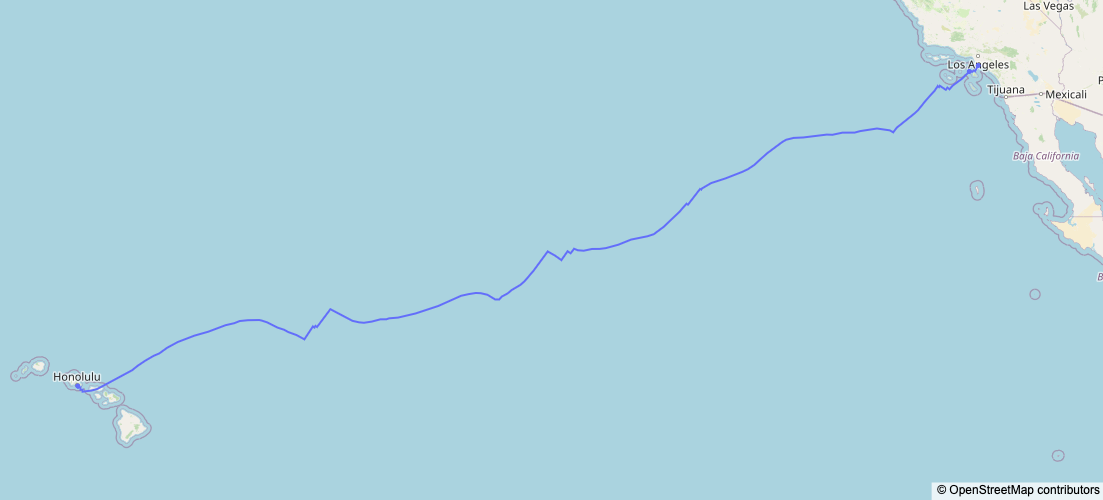

In [35]:
import plotly.express
fig = plotly.express.line_map(route, lat="lat", lon="lng", 
                              hover_name="date",
                              zoom=3, height=500)

scatter_points = plotly.express.scatter_map(waypoints,    
                lat="lat",
                lon="lng",
                hover_name="name")
fig.add_traces(scatter_points.data)

fig.update_layout(map_style="open-street-map", map_zoom=4, 
                  map_center_lat= 26.7,
                  map_center_lon= -137,
                  margin={"r":0,"t":0,"l":0,"b":0})

fig.show()